In [1]:
import json
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


In [2]:
class ElementDiscoveryEval(COCOeval):
    def __init__(self, coco_gt, coco_dt):
        super(ElementDiscoveryEval, self).__init__(coco_gt, coco_dt, "bbox")


dict_color = {27: (0, 84, 255), 42: (57, 255, 20), 45: (255, 0, 127), 21: (255, 255, 51), 53: (0, 255, 255), 12: (255, 102, 0), 7: (255, 0, 255), 6: (173, 255, 47), 23: (0, 255, 255), 16: (255, 0, 255), 50: (255, 244, 79), 47: (0, 255, 255), 15: (255, 127, 80), 46: (127, 255, 0), 37: (170, 0, 255), 49: (255, 77, 0), 70: (0, 127, 255), 63: (204, 0, 102), 72: (255, 140, 0), 20: (0, 123, 255), 71: (255, 105, 180), 25: (0, 255, 127), 56: (255, 204, 51), 4: (0, 128, 128), 51: (255, 102, 153), 65: (255, 102, 204), 33: (204, 255, 0), 57: (0, 71, 171), 60: (255, 120, 0), 69: (0, 255, 255), 44: (255, 64, 64), 29: (127, 255, 0), 36: (0, 191, 255), 59: (255, 51, 204), 26: (255, 255, 102), 14: (218, 112, 214), 31: (0, 255, 0), 39: (255, 127, 80), 67: (30, 144, 255), 34: (255, 51, 153), 40: (253, 253, 150), 61: (255, 102, 0), 18: (127, 255, 212), 5: (255, 62, 150), 48: (128, 0, 128), 52: (218, 165, 32), 35: (28, 205, 96), 58: (222, 49, 99), 66: (127, 255, 0), 43: (255, 0, 0), 10: (0, 255, 0), 1: (204, 204, 255), 17: (159, 0, 255), 3: (255, 255, 0), 8: (255, 165, 0), 62: (255, 0, 204), 22: (42, 82, 190), 28: (255, 0, 0), 55: (255, 102, 0), 13: (255, 69, 0), 19: (64, 224, 208), 68: (255, 102, 0), 30: (255, 182, 193), 64: (135, 206, 250), 41: (255, 111, 255), 2: (223, 115, 255), 24: (255, 255, 0), 54: (75, 0, 130), 9: (255, 69, 0), 11: (0, 204, 204), 38: (255, 0, 204), 32: (255, 250, 205)}



In [3]:
# Load results from tsv file, provide ground truth id and cluster index headers. Defaults: 'id', 'cluster'.
dt = "/home/sayanchaki/Downloads/detections_tune-on-real_new.json"
gt = "/home/sayanchaki/Downloads/coco_format_gt(1).json"
image_folder = "/home/sayanchaki/Documents/ICDAR_PAPER/ROIi_dataset_fleurons_comp_2023-07-26/ROIi_dataset_fleurons_comp_512x512_2023-06-27/new_dti_recons/"
output_folder = "/home/sayanchaki/Documents/ICDAR_PAPER/ROIi_dataset_fleurons_comp_2023-07-26/ROIi_dataset_fleurons_comp_512x512_2023-06-27/DTI_recon"
# Read the JSON file containing the annotations


In [5]:
with open(gt, 'r') as f:
    annotations = json.load(f)

# Convert annotations to COCO format
coco_annotations = {
    "images": [],
    "annotations": [],
    "categories": []
}

image_id_map = {}
category_id_map = {}

for annotation in annotations:
    # Assuming each annotation contains 'image_id', 'category_id', 'bbox', and 'score'
    image_id = annotation['image_id']
    category_id = annotation['category_id']
    bbox = annotation['bbox']

    if image_id not in image_id_map:
        # Add image to image map if not already present
        image_id_map[image_id] = len(image_id_map) + 1
        coco_annotations['images'].append({"id": image_id_map[image_id], "file_name": str(image_id) + ".jpg"})

    # Add category to category map if not already present
    if category_id not in category_id_map:
        category_id_map[category_id] = len(category_id_map) + 1
        coco_annotations['categories'].append({"id": category_id_map[category_id], "name": str(category_id)})

    coco_annotations['annotations'].append({
        "id": len(coco_annotations['annotations']) + 1,
        "image_id": image_id_map[image_id],
        "category_id": category_id_map[category_id],
        "bbox": bbox,
        "iscrowd": 0,
        'area': bbox[3] * bbox[2]
    })
    
print(category_id_map)

coco_gt = COCO()
coco_gt.dataset = coco_annotations
coco_gt.createIndex()

{'1768E69_F1AUG1L014_01': 1, '1768E67_F1AUG1L010_01': 2, '1768E69_F1MED1L003_02': 3, '1768E69_F1AUG1L015_01': 4, '1768E69_F1AUG1L016_01': 5, '1768E69_F1MED1L003_01': 6, '1768R129_F1ROM1L004_01': 7, '1768E69_F1MED1L005_02': 8, '1768E67_F1PAR1L003_01': 9, '1768E67_F1PAR1L003_02': 10, '1768E69_F1AUG1L021_01': 11, '1768E69_F1AUG1L019_02': 12, '1768R129_F1ROM1L003_01': 13, '1768E71_F2DES1L001_02': 14, '1768E71_F2DES1L001_01': 15, '1768E71_F2DES1L001_03': 16, '1768E67_F1PAR1L007_01': 17, '1768E69_F1AUG1L020_01': 18, '1768E72_F1DES1L017_04': 19, '1768E72_F1DES1L017_01': 20, 'V_20': 21, 'V_1': 22, 'V_3': 23, '1768E67_F2TEX1L002_02': 24, '1768E71_F2DES1L013_01': 25, '1768E69_F1MED1L014_01': 26, 'V_12': 27, 'V_21': 28, '1768E69_F1MED1L009_01': 29, 'V_18': 30, 'V_19': 31, '1768E69_F1AUG1L017_02': 32, 'V_9': 33, '1768E67_F2TEX1L001_01': 34, '1768E72_F2GAL1L017_01': 35, '1768E67_F1TEX1L005_01': 36, '1768E71_F2DES1L001_09': 37, '1768E69_F1AUG1L018_01': 38, '1768E69_F1MED1L012_01': 39, 'V_17': 40, '1

In [6]:
# Read the JSON file containing the annotations
with open(dt, 'r') as f:
    annotations = json.load(f)

# Convert annotations to COCO format
coco_annotations = {
    "images": [],
    "annotations": [],
    "categories": []
}

image_id_map = {}
category_id_map = {}

# Check if data is a dictionary
##print_keys(annotations)
for annotation in annotations:
    # Assuming each annotation contains 'image_id', 'category_id', 'bbox', and 'score'
    #print(annotation)
    image_id = annotation['img']
    for anns in annotation['anns']:
        #print(anns)
        category_id = anns['id']
        bbox = anns['bbox']

        if image_id not in image_id_map:
          # Add image to image map if not already present
          image_id_map[image_id] = len(image_id_map) + 1
          coco_annotations['images'].append({"id": image_id_map[image_id], "file_name": str(image_id) + ".jpg"})

        # Add category to category map if not already present
        if category_id not in category_id_map:
          category_id_map[category_id] = len(category_id_map) + 1
          coco_annotations['categories'].append({"id": category_id_map[category_id], "name": str(category_id)})

        coco_annotations['annotations'].append({
          "id": len(coco_annotations['annotations']) + 1,
          "image_id": image_id_map[image_id],
          "category_id": category_id_map[category_id],
          "bbox": bbox,
          "iscrowd": 0,
          'area': bbox[3] * bbox[2]
        })

# Create COCO instances
coco_dt = COCO()
coco_dt.dataset = coco_annotations
coco_dt.createIndex()

# Example usage of COCO API
# Get all category IDs
category_ids = coco_gt.getCatIds()
print("Category IDs:", category_ids)

# Get all image IDs
image_ids = coco_gt.getImgIds()
print("Image IDs:", image_ids)

# Get annotations for a specific image
image_id = image_ids[0]
annotations_ids = coco_gt.getAnnIds(imgIds=image_id)
annotations = coco_gt.loadAnns(annotations_ids)
#print("Annotations for Image {}: {}".format(image_id, annotations))
annotations = coco_dt.loadAnns(annotations_ids)
#print("Annotations for Image {}: {}".format(image_id, annotations))

creating index...
index created!
Category IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
Image IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [7]:
# Define colors for each category ID
category_color_map =  {27: (0, 84, 255), 42: (57, 255, 20), 45: (255, 0, 127), 21: (255, 255, 51), 53: (0, 255, 255), 12: (255, 102, 0), 7: (255, 0, 255), 6: (173, 255, 47), 23: (0, 255, 255), 16: (255, 0, 255), 50: (255, 244, 79), 47: (0, 255, 255), 15: (255, 127, 80), 46: (127, 255, 0), 37: (170, 0, 255), 49: (255, 77, 0), 70: (0, 127, 255), 63: (204, 0, 102), 72: (255, 140, 0), 20: (0, 123, 255), 71: (255, 105, 180), 25: (0, 255, 127), 56: (255, 204, 51), 4: (0, 128, 128), 51: (255, 102, 153), 65: (255, 102, 204), 33: (204, 255, 0), 57: (0, 71, 171), 60: (255, 120, 0), 69: (0, 255, 255), 44: (255, 64, 64), 29: (127, 255, 0), 36: (0, 191, 255), 59: (255, 51, 204), 26: (255, 255, 102), 14: (218, 112, 214), 31: (0, 255, 0), 39: (255, 127, 80), 67: (30, 144, 255), 34: (255, 51, 153), 40: (253, 253, 150), 61: (255, 102, 0), 18: (127, 255, 212), 5: (255, 62, 150), 48: (128, 0, 128), 52: (218, 165, 32), 35: (28, 205, 96), 58: (222, 49, 99), 66: (127, 255, 0), 43: (255, 0, 0), 10: (0, 255, 0), 1: (204, 204, 255), 17: (159, 0, 255), 3: (255, 255, 0), 8: (255, 165, 0), 62: (255, 0, 204), 22: (42, 82, 190), 28: (255, 0, 0), 55: (255, 102, 0), 13: (255, 69, 0), 19: (64, 224, 208), 68: (255, 102, 0), 30: (255, 182, 193), 64: (135, 206, 250), 41: (255, 111, 255), 2: (223, 115, 255), 24: (255, 255, 0), 54: (75, 0, 130), 9: (255, 69, 0), 11: (0, 204, 204), 38: (255, 0, 204), 32: (255, 250, 205)}

'''for cat in coco_gt.dataset['categories']:
    category_color_map[cat['id']] = np.random.randint(0, 255, size=(3,)).tolist()'''


"for cat in coco_gt.dataset['categories']:\n    category_color_map[cat['id']] = np.random.randint(0, 255, size=(3,)).tolist()"

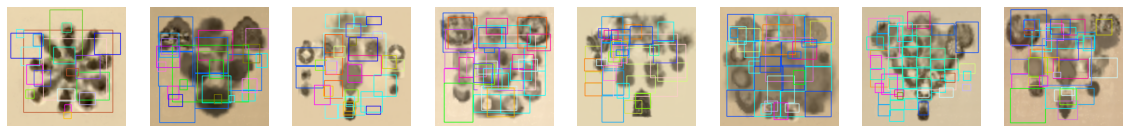

In [11]:
import matplotlib.pyplot as plt
import os
import cv2

# Get all image IDs
image_ids = coco_gt.getImgIds()

output_images = []

for image_id in image_ids:
    # Load image
    image_info = coco_gt.loadImgs(image_id)[0]
    image_info['file_name'] = image_info['file_name'].replace('.jpg', '.png')
    image_path = os.path.join(image_folder, image_info['file_name'])
    if not os.path.exists(image_path):
        #print(f"Image file not found: {image_path}")
        continue 
    image = cv2.imread(image_path)
    image = cv2.resize(image,(512,512))
    #print("Image:", image_path)

    # Get annotations for the image
    gt_ann_ids = coco_gt.getAnnIds(imgIds=image_id)
    gt_annotations = coco_gt.loadAnns(gt_ann_ids)

    dt_ann_ids = coco_dt.getAnnIds(imgIds=image_id)
    dt_annotations = coco_dt.loadAnns(dt_ann_ids)

    # Draw bounding boxes with category-based colors
    for gt_ann in gt_annotations:
        bbox = gt_ann['bbox']
        category_id = gt_ann['category_id']
        color = category_color_map[category_id]
        image = cv2.rectangle(image, (int(bbox[0]), int(bbox[1])), 
                              (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3])), color, 2)
        #print("Ground Truth - Category ID:", category_id, "Bounding Box:", bbox)

    for dt_ann in dt_annotations:
        bbox = dt_ann['bbox']
        category_id = dt_ann['category_id']
        color = category_color_map[category_id]
        image = cv2.rectangle(image, (int(bbox[0]), int(bbox[1])), 
                              (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3])), color, 2)
        #print("Detection - Category ID:", category_id, "Bounding Box:", bbox)

    # Append the image to the list
    output_images.append(image)

# Display all images in a row
plt.figure(figsize=(20, 10))
for i, img in enumerate(output_images):
    plt.subplot(1, len(output_images), i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()
